In [4]:
import numpy as np
import matplotlib.pyplot as plt
from os import path
π = np.pi
import scipy.constants as constants

#plt.style.use('notebook')
#%config InlineBackend.figure_format = 'svg'
#%matplotlib inline

# Argon Adsorption inside MCM-41

In [5]:
m_mcm = 6.133 # g

# monolayer coverage
A = 8.994 #mmol/g

# pore diameter
D = 30 #Å

# thickness of Ar layer
w = 3.5 # Å

## Determining propertires of the argon monolayer

see: https://en.wikipedia.org/wiki/Noble_gas_(data_page) for gas data

In [6]:
# Argon mass
m_Ar = 39.948/constants.N_A # g

# Number of argon atoms
N_Ar = A*1E-3*m_mcm*constants.N_A

# volume of monolayer
V = 915*1E20*m_mcm*w

# number density of argon
n = N_Ar/V # 1/Å^3

## Number Density of Liquid Argon

In [7]:
ρ_Ar_liquid = 1393.9 # g/dm^3

n_Ar_liquid = ρ_Ar_liquid / m_Ar / (1E-3*1E30) # 1/Å^3

In [8]:
n_Ar_liquid

0.021012971876849907

## Number Density of Liquid Neon

In [9]:
m_Ne = 20.1797/constants.N_A # g

ρ_Ne_liquid = 1207 # g/dm^3

n_Ne_liquid = ρ_Ne_liquid / m_Ne / (1E-3*1E30) # 1/Å^3

In [10]:
n_Ne_liquid

0.0360199799666001

## Paul's Experimental Isotherms


### Ar/MCM-41

In [12]:
import include.colors as colortools
colors_v = colortools.get_linear_colors('viridis',8,reverse=False)

In [13]:
isotherm = {}
isotherm['Ar/MCM41'] = np.loadtxt('../Data/Sokol_Ar_MCM41_Isotherm.dat')
isotherm['He/Ar/MCM41'] = np.loadtxt('../Data/Sokol_He_Ar_MCM41_Isotherm.dat')
cT = 4.2

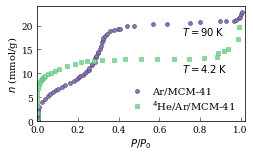

In [15]:
plt.style.reload_library()
with plt.style.context('./include/aps.mplstyle'):
    figsize=plt.rcParams['figure.figsize']
    fig,ax = plt.subplots(figsize=(figsize[0],figsize[1]),constrained_layout=True)

    #ax.set_xscale("log", nonposx='clip')

    ax.plot(isotherm['Ar/MCM41'][:,0],isotherm['Ar/MCM41'][:,1],'o',ms=4, mec=colors_v[1],mew=0.5, 
            mfc=colortools.get_alpha_hex(colors_v[1],0.65), label='Ar/MCM-41')
   
    ax.plot(isotherm['He/Ar/MCM41'][:,0],isotherm['He/Ar/MCM41'][:,1],'s',ms=4, mec=colors_v[5], mew=0.5,
            mfc=colortools.get_alpha_hex(colors_v[5],0.65), label='$^4$He/Ar/MCM-41')
    ax.annotate('$T = 90\; \mathrm{{K}}$', xy=(0.7,0.75), xytext=(0.7,0.75),xycoords=ax.transAxes)
    ax.annotate(f'$T = {cT:3.1f}\; \mathrm{{K}}$', xy=(0.7,0.425), xytext=(0.7,0.425),xycoords=ax.transAxes)

    ax.set_xlabel(r'$P/P_0$')
    ax.set_ylabel(r'$n$ (mmol/g)')
    plt.legend()
    
    ax.set_ylim(0,24)
    ax.set_xlim(0,1.02)
    plt.savefig('plots/He_Ar_MCM41_isotherm.pdf')
    plt.savefig('plots/He_Ar_MCM41_isotherm.svg',dpi=300)